# Flying Foxes: The Animal Not The Equipment

Describe dataset
Why was it collected?
Who paid for it?
Where did you get it from?

In [138]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import geopandas
import shapely
import fiona

from datetime import datetime


In [139]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 20)
saved_style_state = matplotlib.rcParams.copy()

In [140]:
dataframes = []
for f in os.listdir("fox"):
    print(f)
    df = pd.read_csv(os.path.join("fox", f), parse_dates=[4])
    dataframes.append(df)

fox_df = pd.concat(dataframes)
fox_df.sample(6)


flyingfox_april_june.csv
flyingfox_jan_mar.csv
flyingfox_jul_sep.csv
flyingfox_oct_dec.csv


,Name of local government,Name of camp,Latitude,Longitude,Date of survey,Flying-fox absent (true/false),Total number of black flying-fox,Total number of Grey-headed flying-fox,Total number of Little red flying-fox,Total number of Spectacled flying-fox,Total number of all species,EHP camp identification,CSIRO camp identification
132,Southern Downs,Stanthorpe (Gleason Park - Quart Pot Ck),-28.651918,151.931087,2019-03-06,False,1500,0.0,0,0,1500,145,451.0
69,Somerset,"Linville, John Street",-26.841322,152.278415,2019-08-16,True,0,0.0,0,0,0,206,552.0
77,Fraser Coast,"Dundowran Beach, Ocean Park Drive, Petersons Park",-25.270079,152.745372,2019-11-14,True,0,0.0,0,0,0,249,760.0
61,Baloone,St George,-28.025529,148.589506,2019-08-15,True,0,0.0,0,0,0,280,770.0
88,Sunshine Coast,"Coolum, Cassia Wildlife Corridor & Elizabeth S...",-26.532800,153.085496,2019-08-16,False,596,161.0,0,0,757,198,322.0
107,Noosa,"Noosaville, Wallace Drive",-26.400669,153.049086,2019-05-21,False,0,0.0,0,0,0,245,781.0


In [141]:
shape = fox_df.shape
print("Rows: " + str(shape[0]))
print("Columns: " + str(shape[1]))

foxlist = ["Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]

Rows: 580
Columns: 13


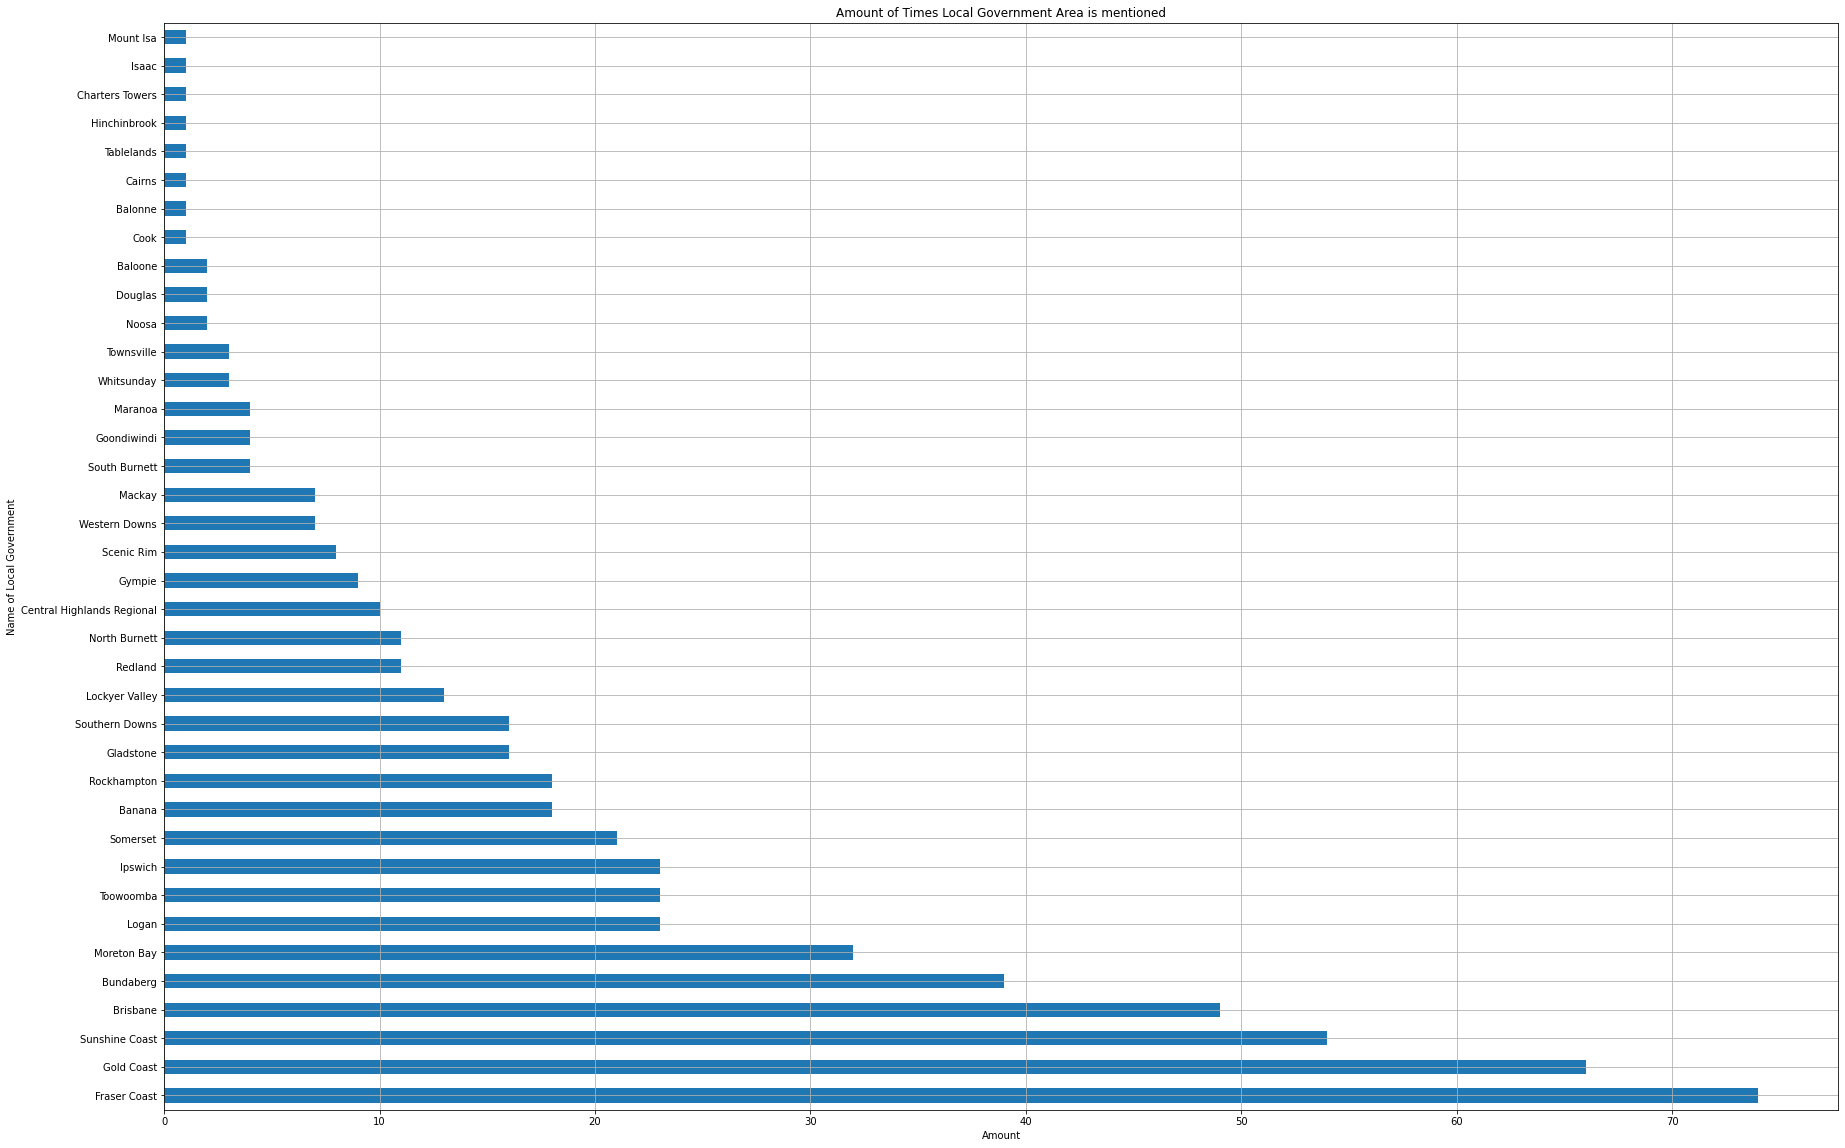

In [168]:
fox_df["Name of local government"].value_counts().plot.barh()
plt.title("Amount of Times Local Government Area is mentioned", fontsize=12)
plt.xlabel('Amount', fontsize=10)
plt.ylabel('Name of Local Government', fontsize=10)
plt.grid(True)
plt.show()

Shows the amount of camps/roosts in each local government. Fraser Coast has the most camps.

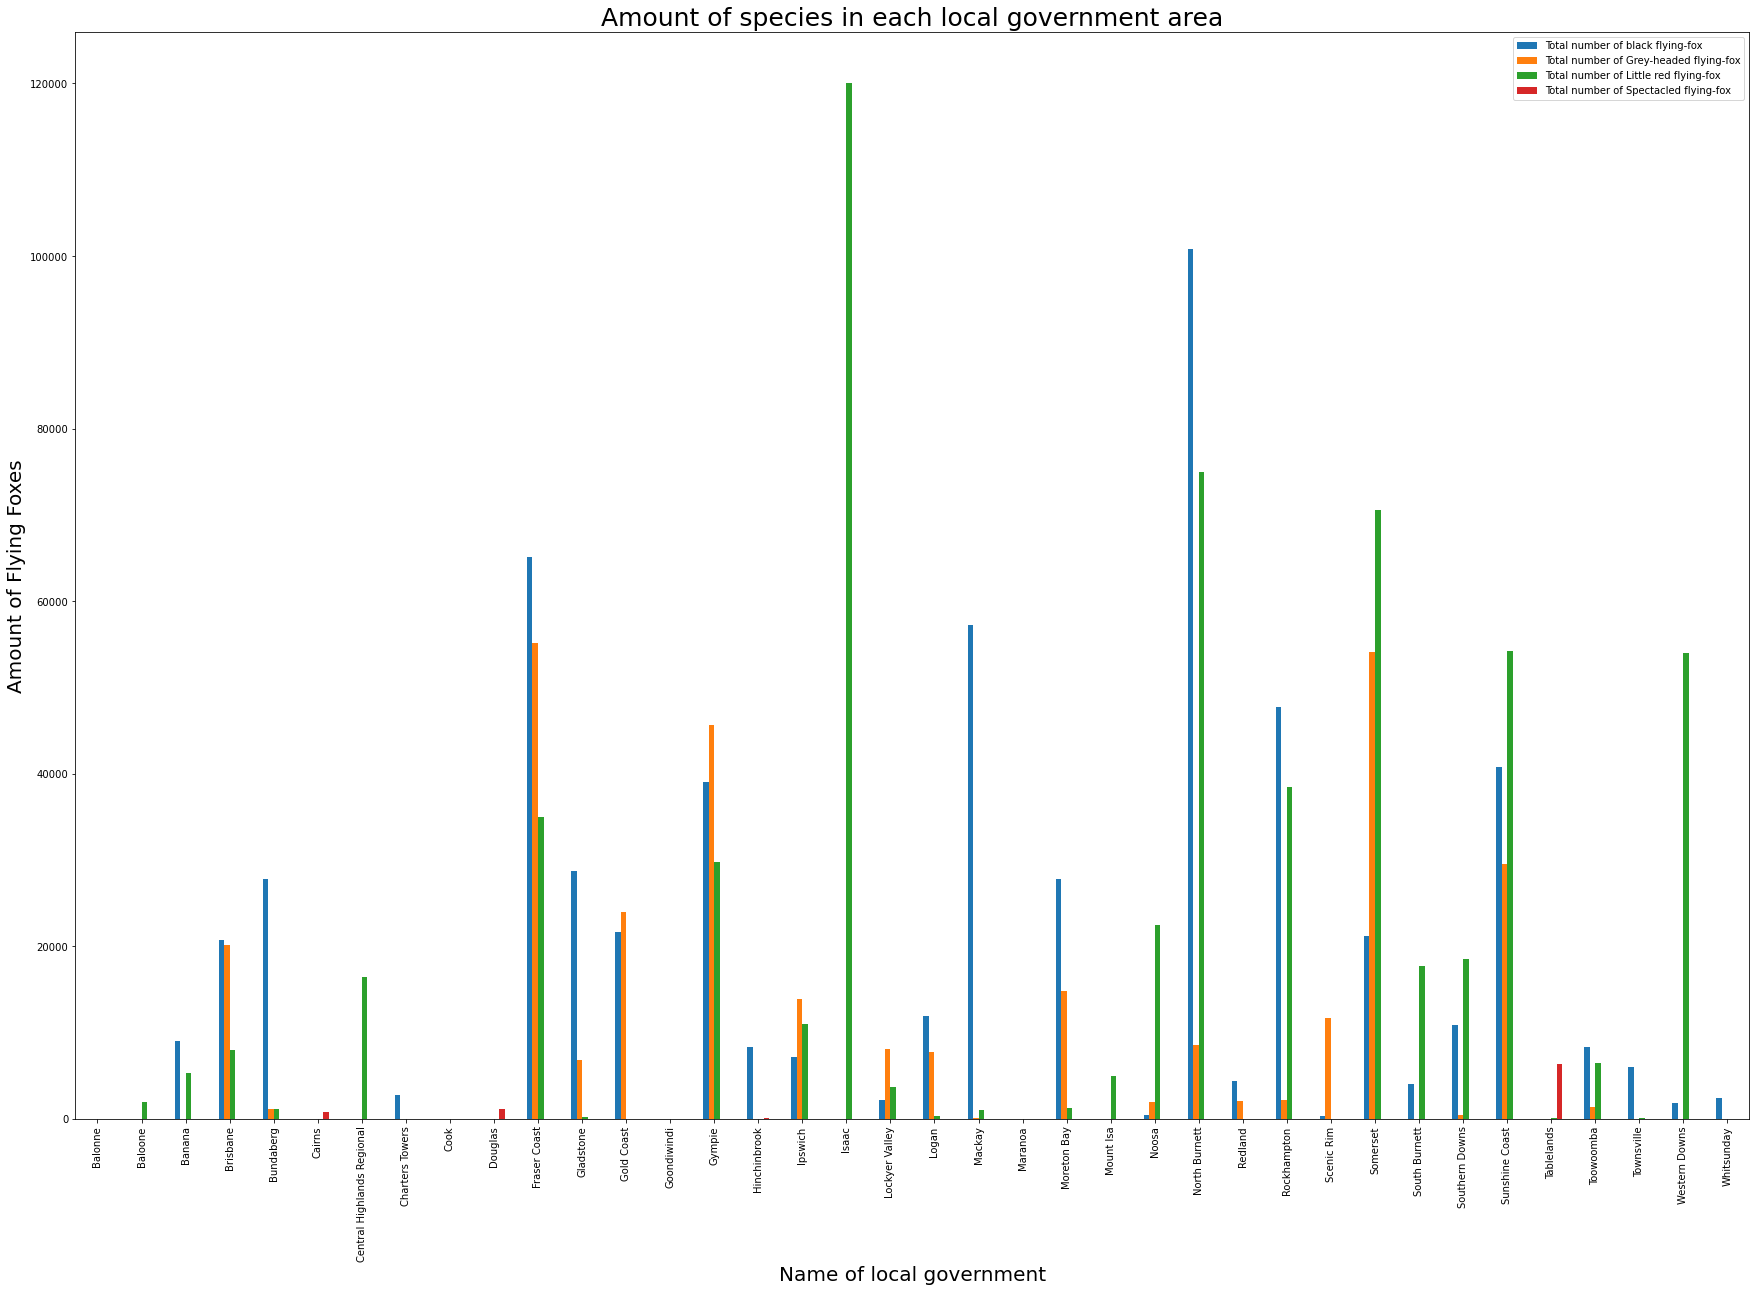

In [165]:
fox_df[["Name of local government","Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]].groupby("Name of local government").sum().plot(kind='bar')

plt.title("Amount of species in each local government area", fontsize=25)
plt.xlabel('Name of local government', fontsize=20)
plt.ylabel('Amount of Flying Foxes', fontsize=20)
plt.xticks(rotation = 90)
plt.show()

There are more little red and black flying foxes. This is due to grey headed and spectacled being threatened.
Despite Fraser Coast having the most camps. Other government areas have more little red flying foxes

<AxesSubplot:xlabel='Name of camp'>

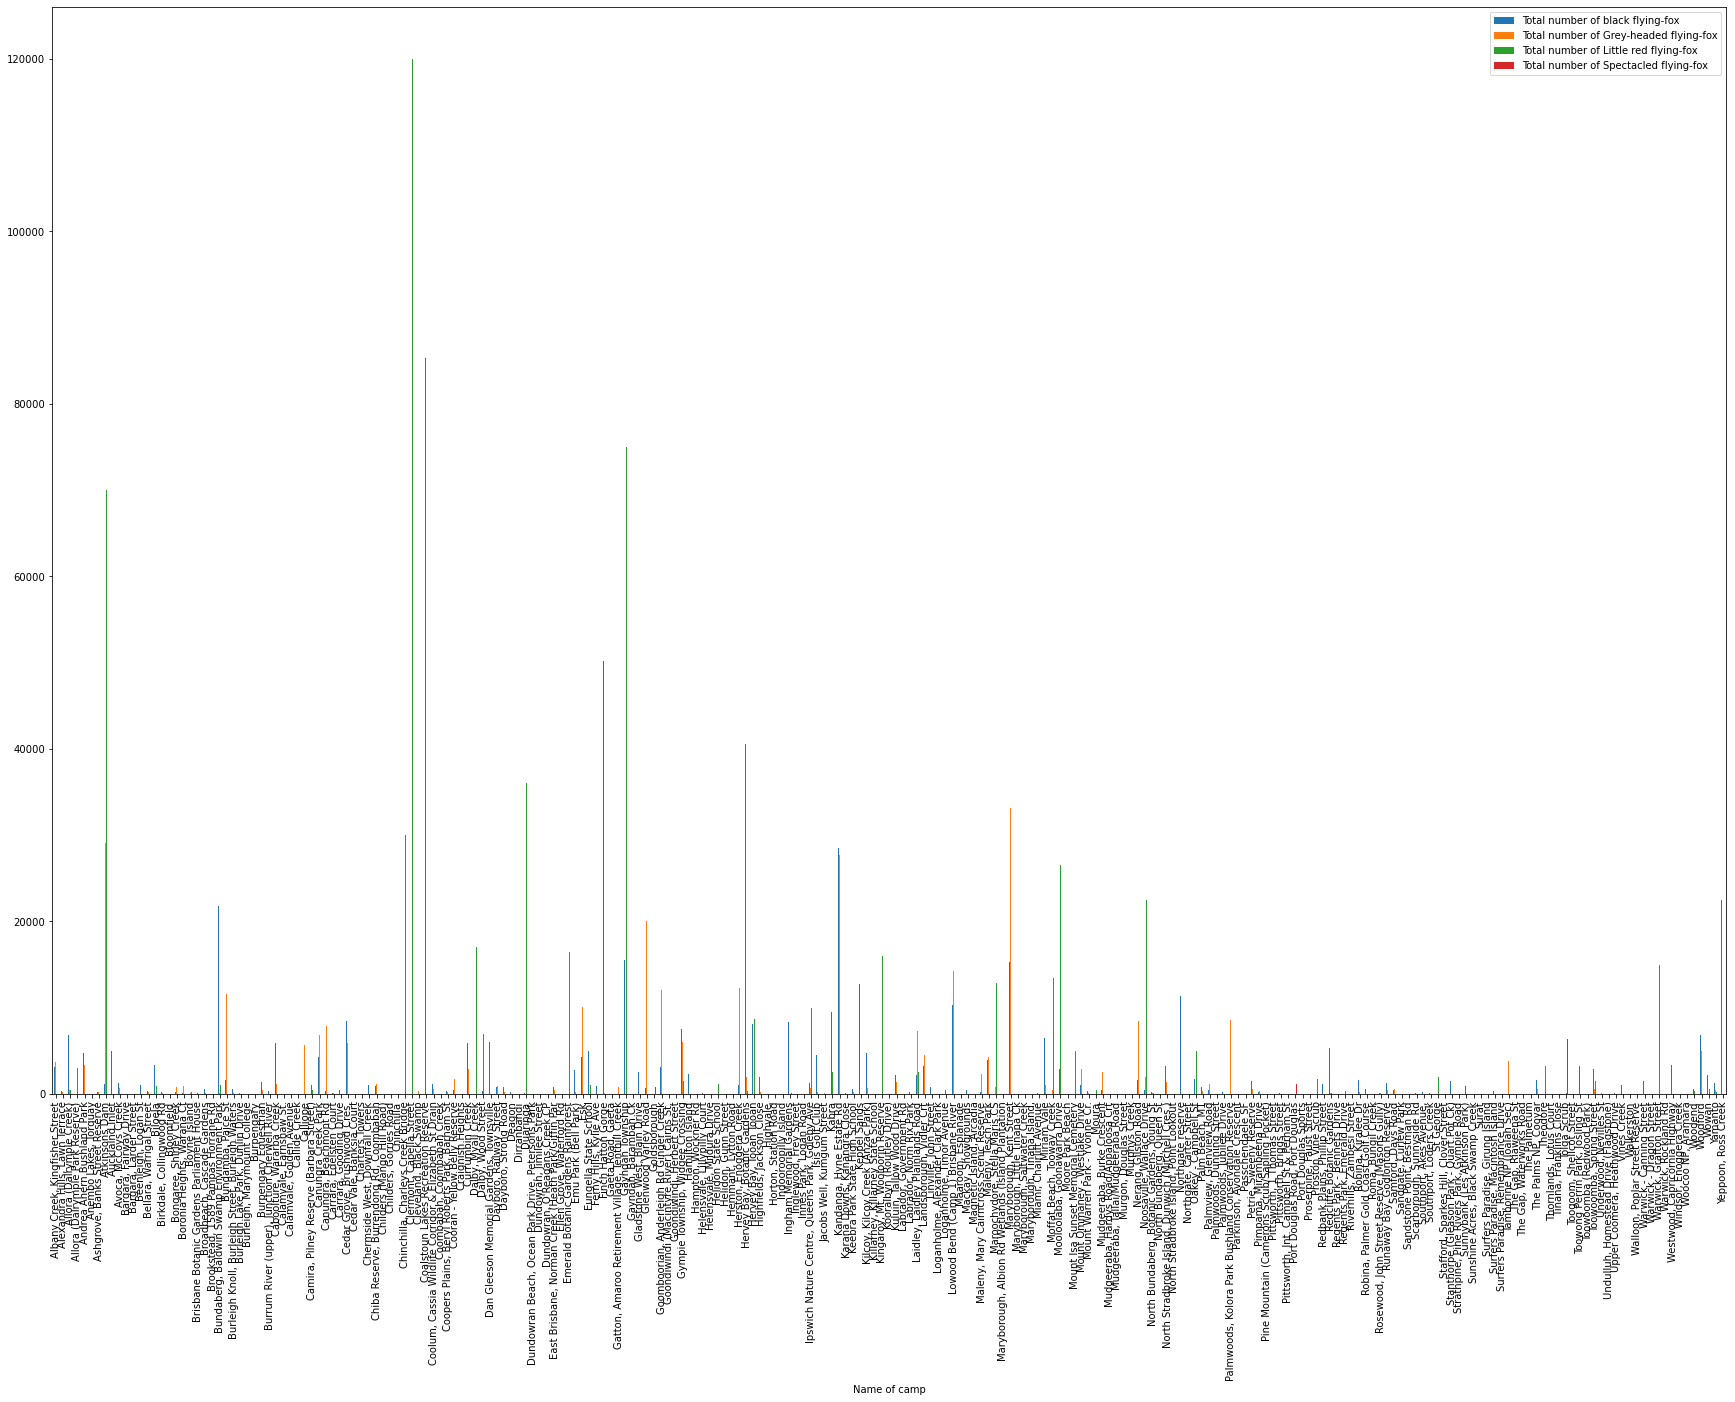

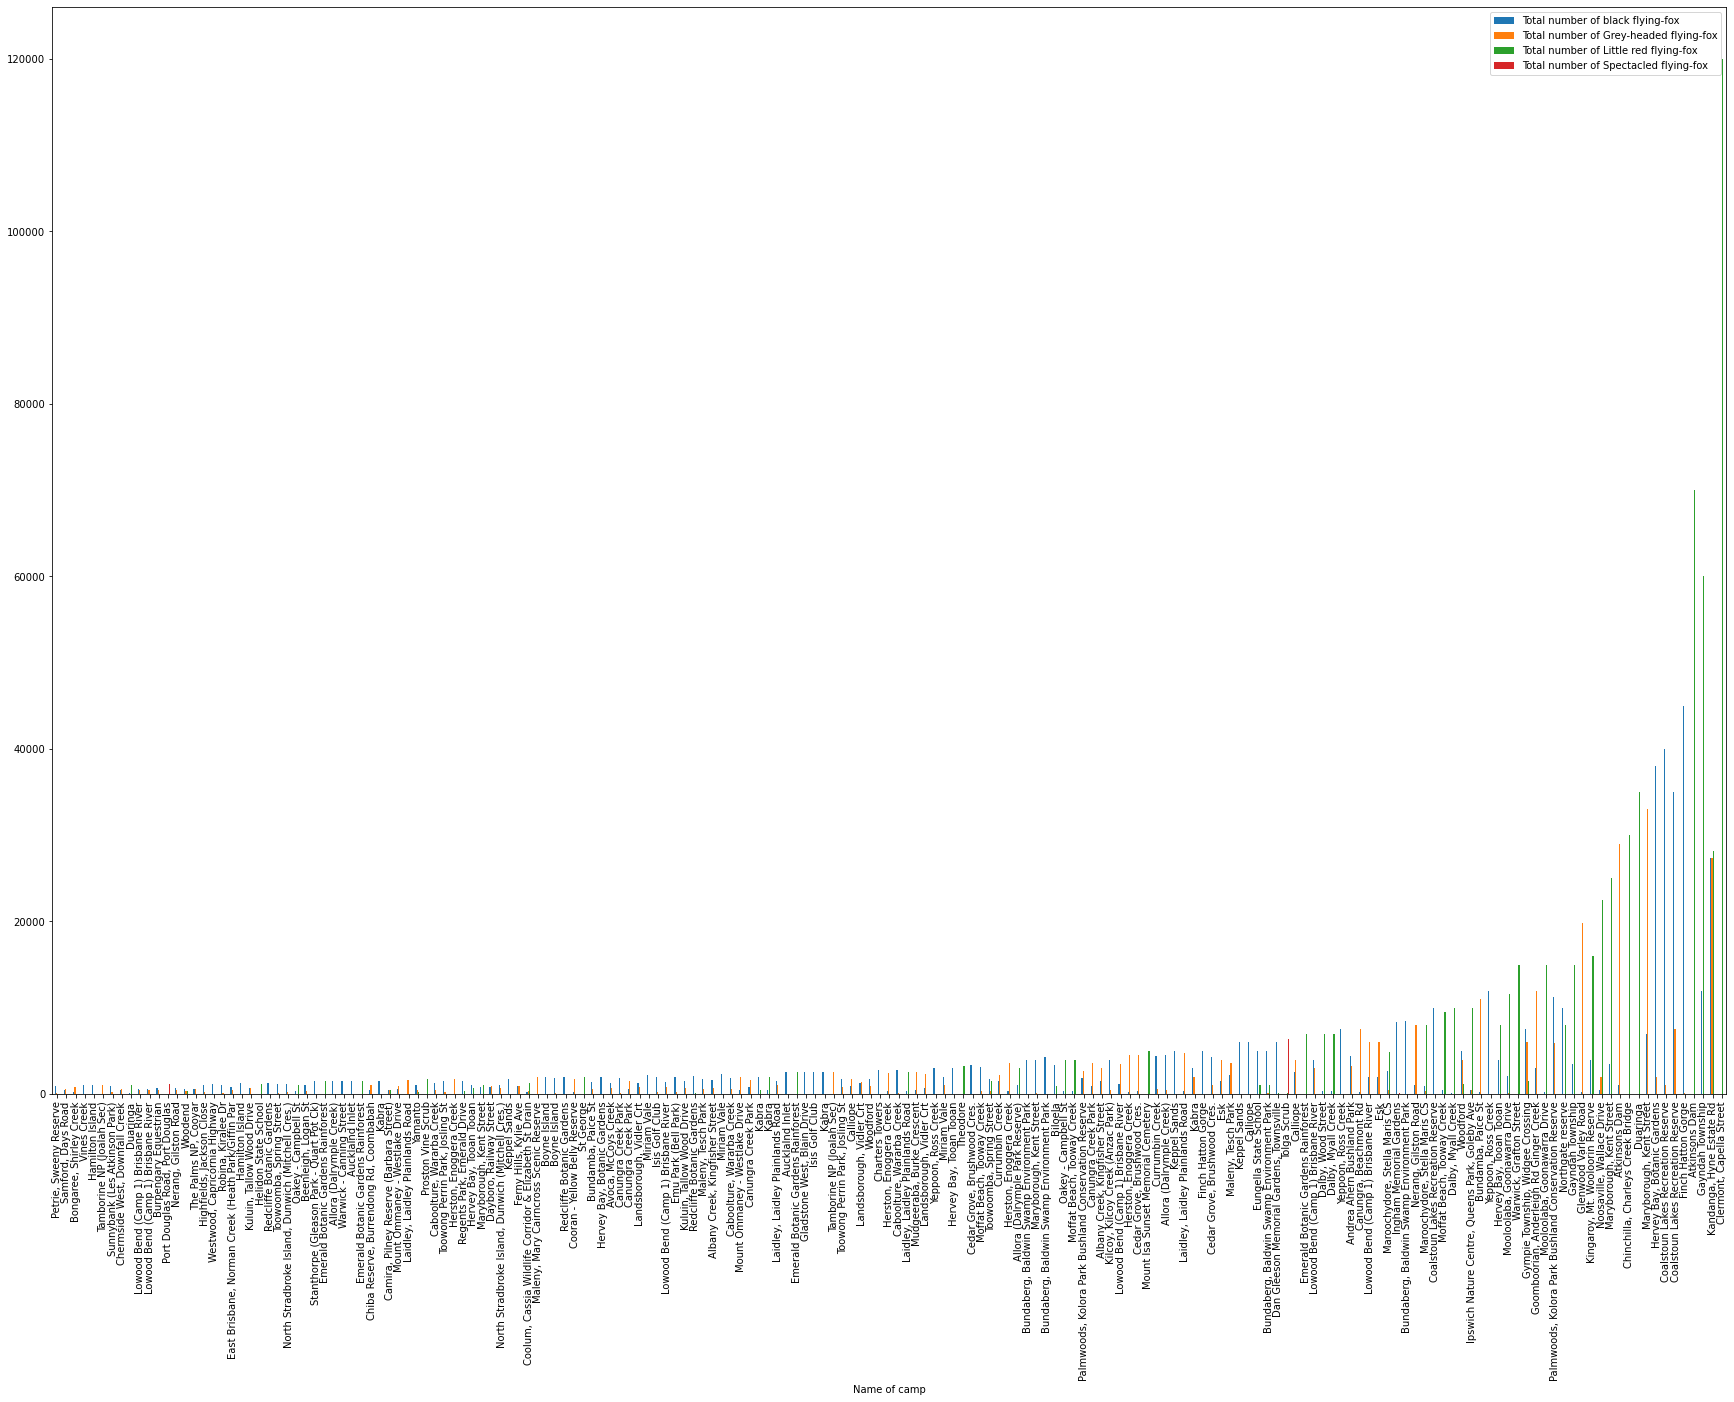

In [144]:
topcamps = fox_df[fox_df["Total number of all species"] > 1000].sort_values("Total number of all species")

fox_df[["Name of camp","Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]].groupby("Name of camp").sum().plot(kind='bar')

topcamps.plot(x="Name of camp", y=["Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"], kind="bar")

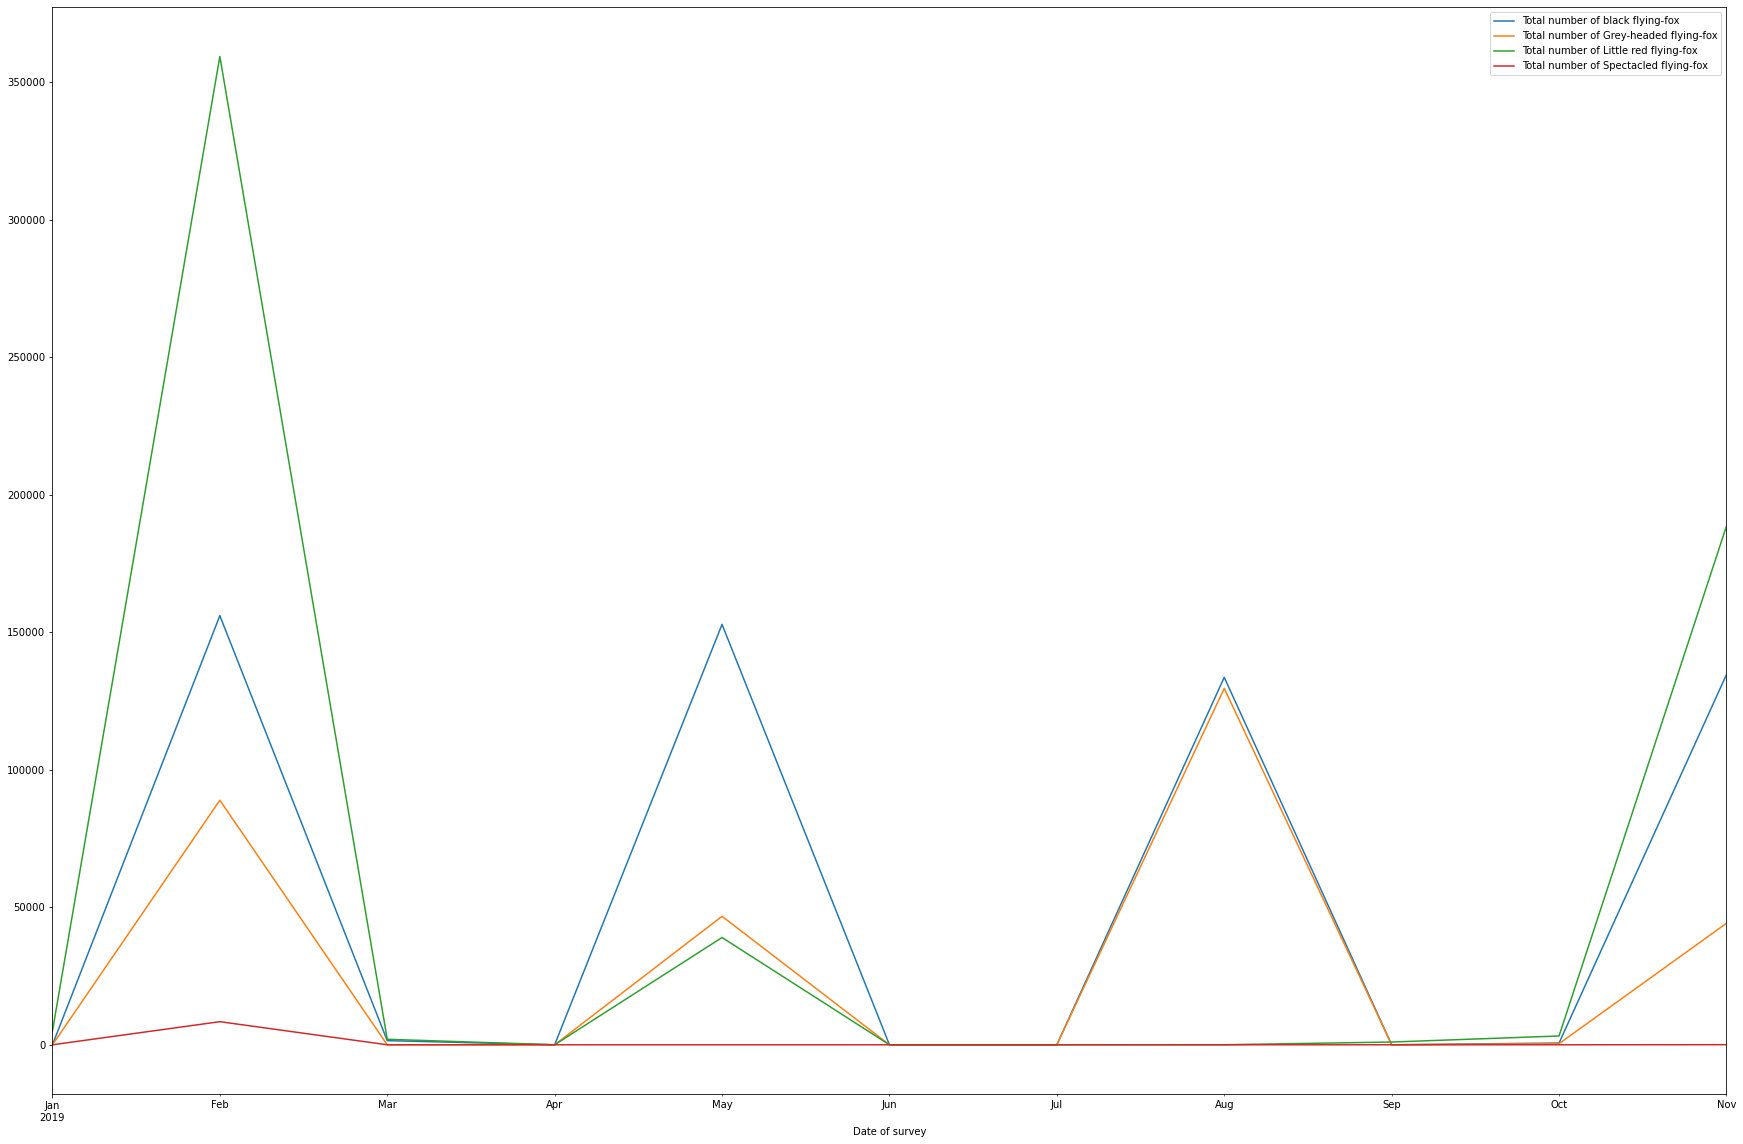

In [187]:
fox_df.groupby(pd.Grouper(key="Date of survey", freq="M")).sum().plot(y=["Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"])



Suryvers were done at even time intervals

<AxesSubplot:xlabel='Total number of all species'>

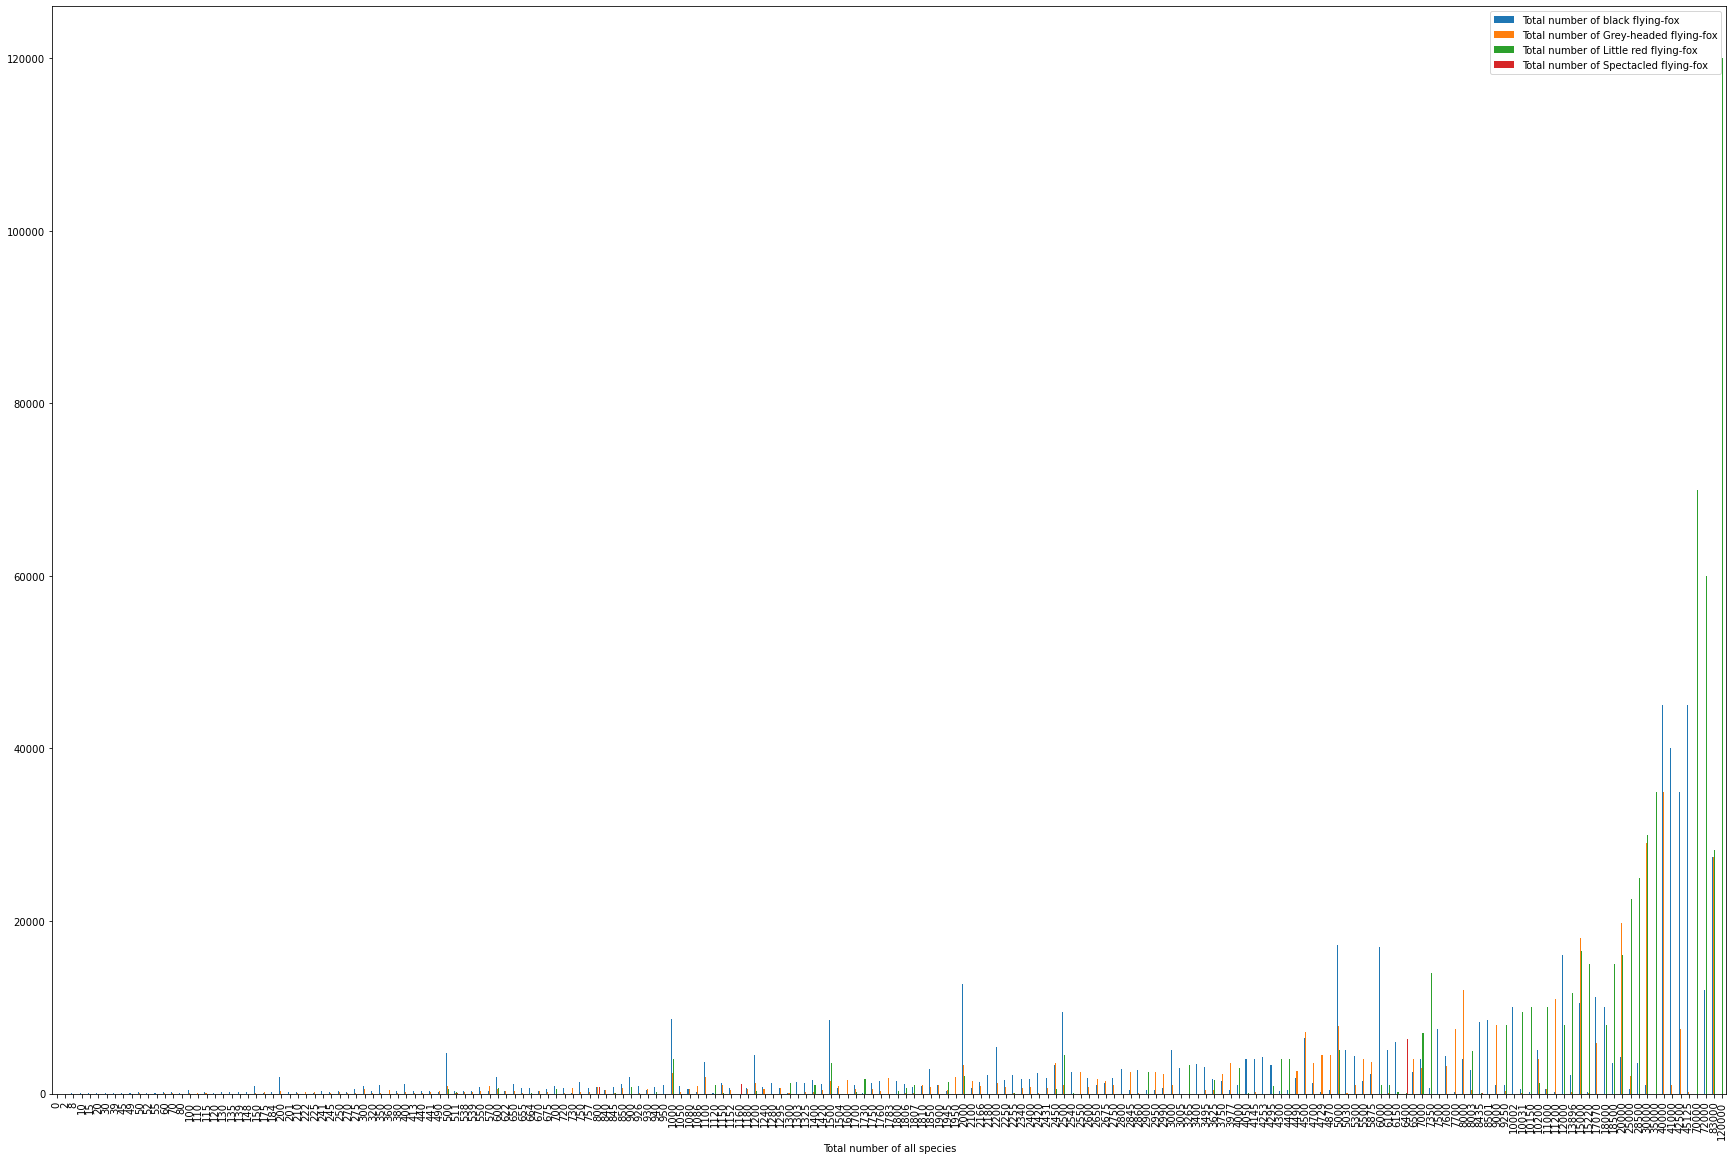

In [194]:
'''fox_df.groupby(["Total number of all species"]).sum().plot(y=["Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"], kind='bar')'''

<AxesSubplot:ylabel='Name of camp'>

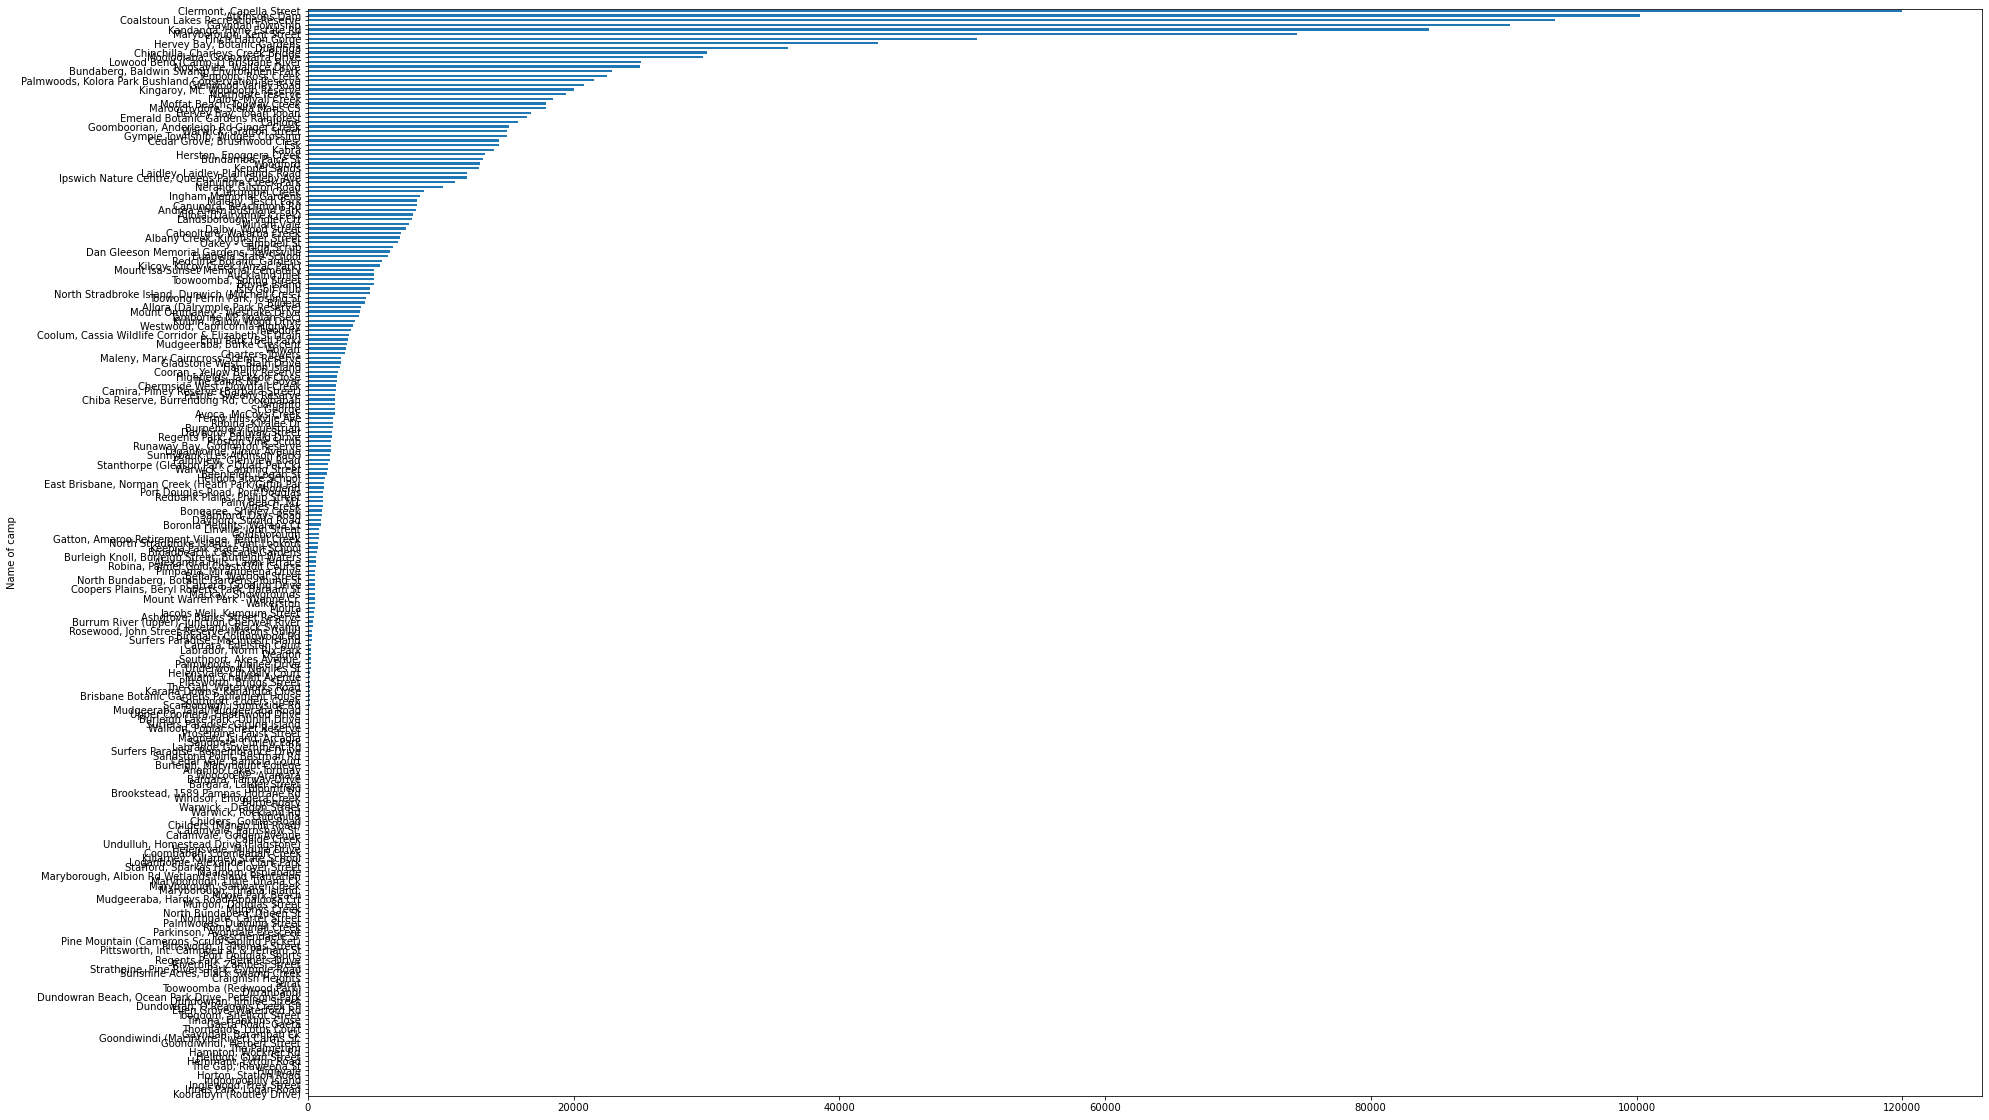

In [146]:
fox_df.groupby("Name of camp")["Total number of all species"].sum().sort_values().plot(kind='barh')